In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
##drop uneccesary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [9]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

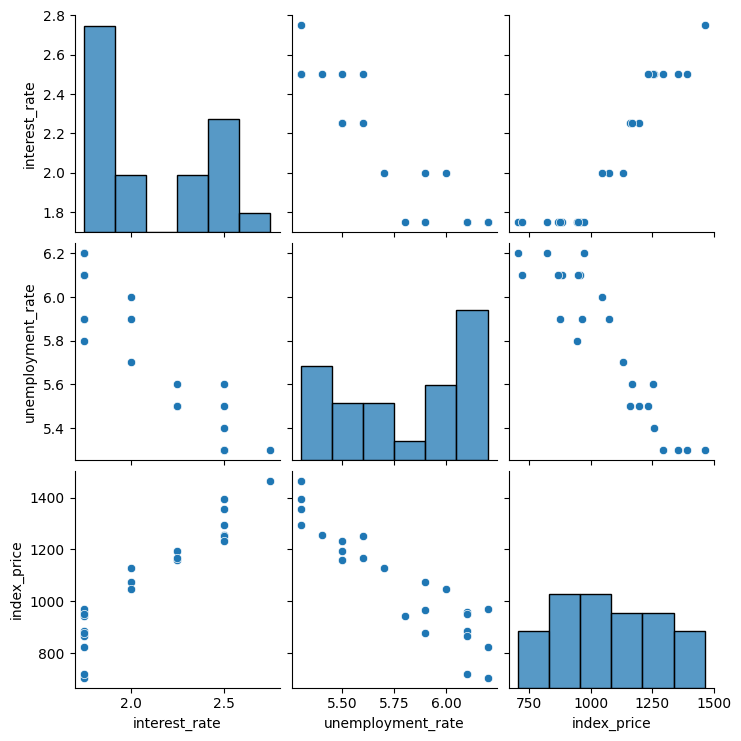

In [12]:
##lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [13]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate ')

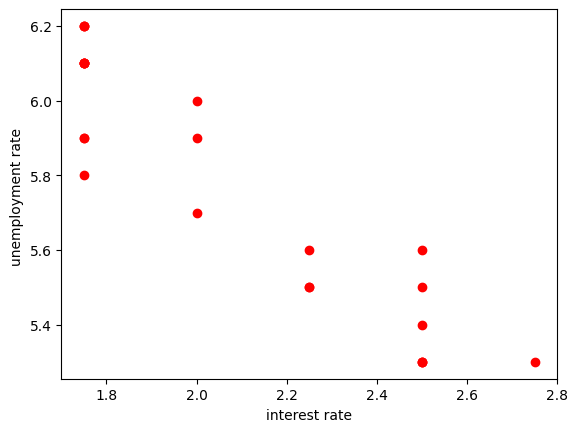

In [15]:
##visualize the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest rate")
plt.ylabel("unemployment rate ")

In [16]:
##independent and dependent features
X=df_index.iloc[:,:-1]##first take all the column and then remove the last column
y=df_index.iloc[:,-1] ##here it basically means: take the last column and put it in the y value

In [17]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [19]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

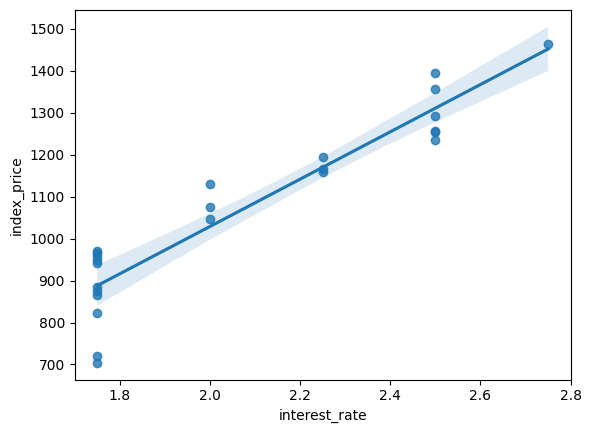

In [22]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])  # Plot data in linear model fit

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

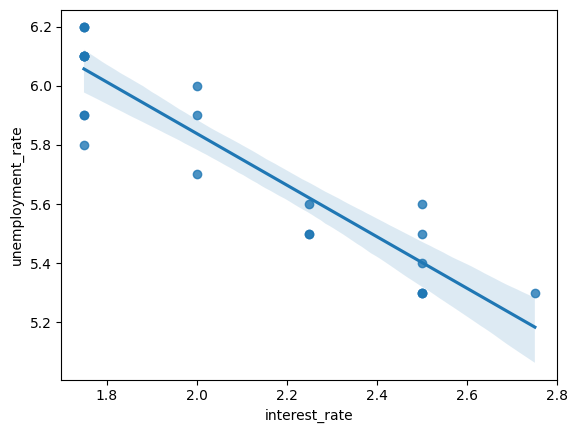

In [23]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])  # Plot data in linear model fit

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train ## it got converterd into a 2D array

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [29]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [30]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
##cross validation score
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

'''cv=5 means, suppose i have a dataset of 1000 values, so it will divide the data set into 5 parts,
and then it will take 4 parts for training and 1 part for testing, and it will do this 5 times, each time taking a different part for testing
also for every every scoring parameter, there is a MSE and RMSE version'''

'cv=5 means, suppose i have a dataset of 1000 values, so it will divide the data set into 5 parts,\nand then it will take 4 parts for training and 1 part for testing, and it will do this 5 times, each time taking a different part for testing\nalso for every every scoring parameter, there is a MSE and RMSE version'

In [33]:
np.mean(validation_score) 

np.float64(-5914.828180162386)

In [ ]:
##prediction on test data
y_pred=regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [35]:
##performance metrices
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  5793.762887712569
MAE:  59.935781523235484
RMSE:  76.11677139574805


In [37]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 score: ",score)
#display adjusted R2 score
adjusted_r2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score: ",adjusted_r2)

R2 score:  0.8278978091457145
Adjusted R2 score:  0.7131630152428576


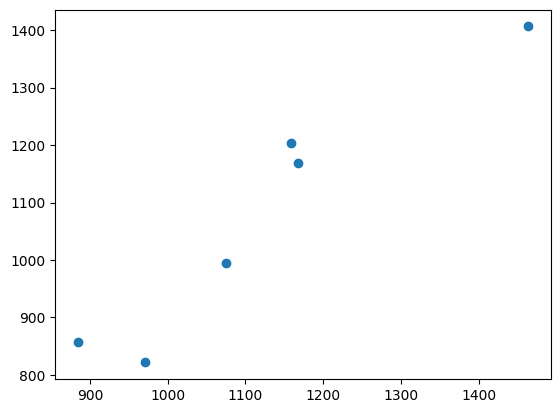

In [39]:
##Assumptions of linear regression
plt.scatter(y_test,y_pred)

In [ ]:
residuals=y_test-y_pred
print(residuals) 
'''residuals means the difference between the actual value 
and the predicted value, and it should be normally distributed'''

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


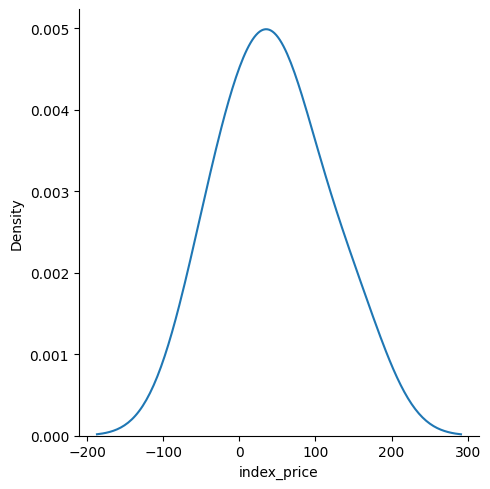

In [41]:
##plot this residuals
sns.displot(residuals,kind="kde") #kde=kernel density estimation

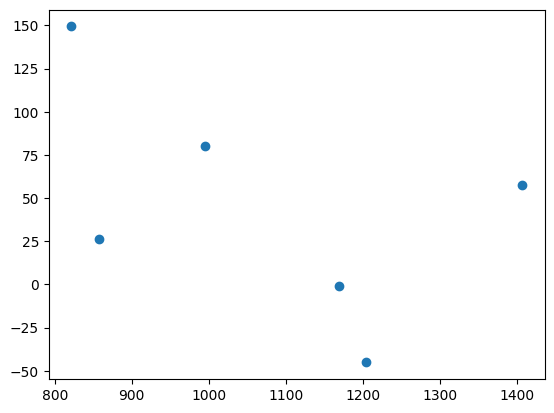

In [ ]:
##scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals) 
'''when we plot this, it should be in a random manner, 
if it is not, then it means that there is some pattern in the data, 
and linear regression is not the best model for this data'''

In [43]:
##OLS Linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit() #ordinary least squares

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 13 Sep 2025   Prob (F-statistic):                       0.754
Time:                        11:39:06   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regression.coef_) ##its matching with the stats model

[  88.27275507 -116.25716066]
